## Regression

Modified from coursera/machine learning with python

### Load necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score

### Load dataset
dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
regression_dir = "Data/Regression/"
df = pd.read_csv(regression_dir + 'train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

In [4]:
# column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

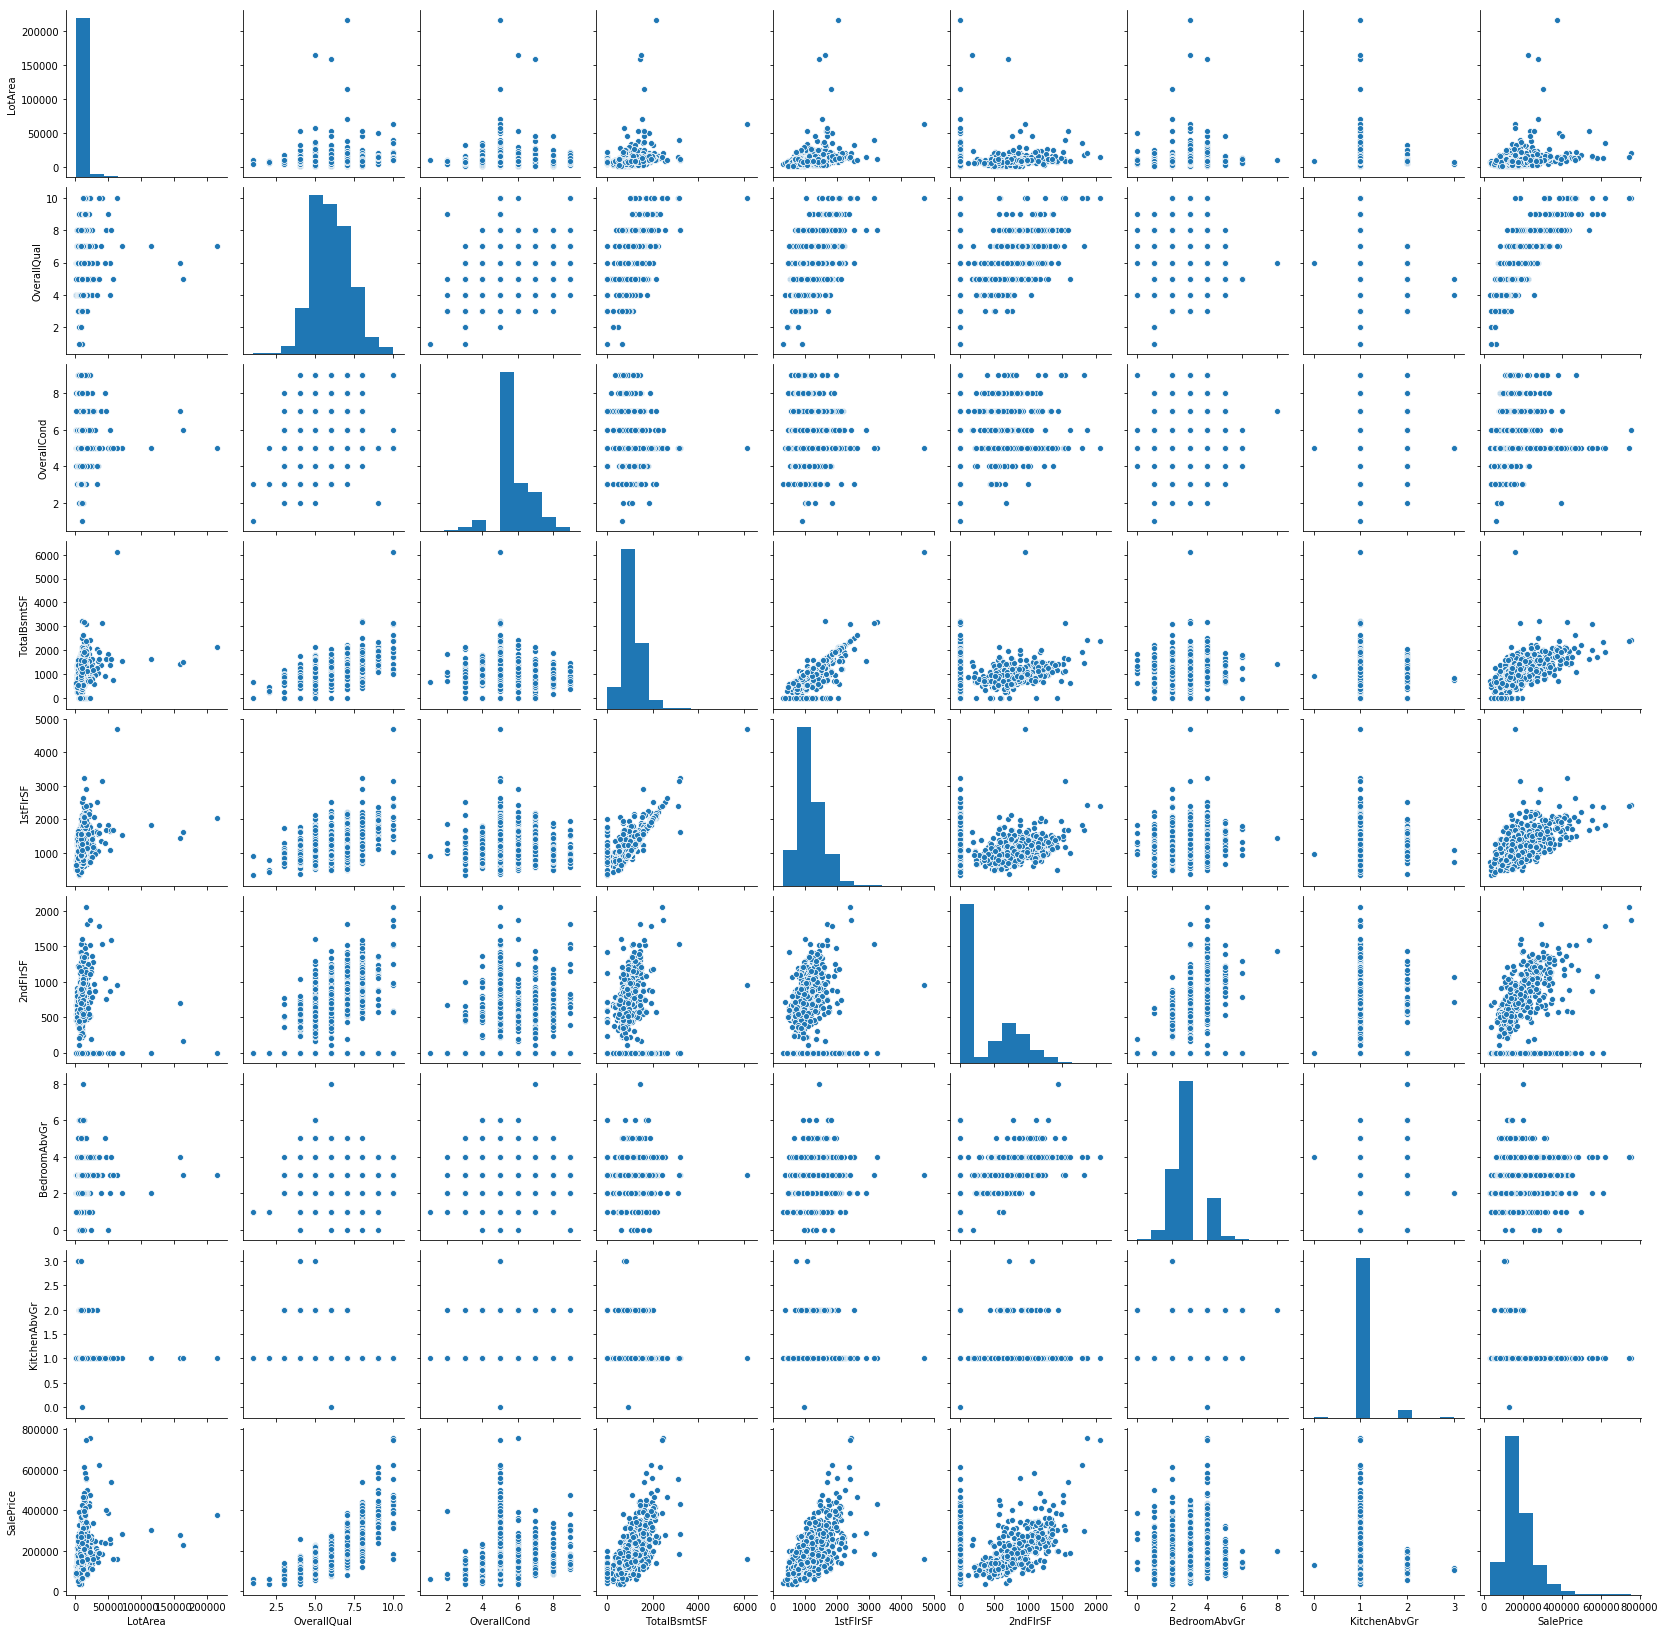

In [5]:
# explore columns of interest
sdf = df[['LotArea', 'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']]
sns.pairplot(sdf)

There seems to be correlation between selected predictors and saleprice

### Preprocessing

First, convert categorical variable to indicator variables

In [6]:
le_nbh = preprocessing.LabelEncoder()
sdf.loc[:, 'Neighborhood'] = le_nbh.fit_transform(sdf.loc[:, 'Neighborhood'])
le_bdt = preprocessing.LabelEncoder()
sdf.loc[:, 'BldgType'] = le_bdt.fit_transform(sdf.loc[:, 'BldgType'])

c:\users\wangj\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Split the train and test set

In [7]:
train, test = train_test_split(sdf)
print(f"Training set contains {train.shape[0]} records")
print(f"Test set contains {test.shape[0]} records")
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

Training set contains 1095 records
Test set contains 365 records


Normalize the dataset

In [8]:
StdScaler = preprocessing.StandardScaler()
X_train = StdScaler.fit_transform(X_train)
X_test = StdScaler.transform(X_test)

### Linear Regression


In [9]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# the coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [ 3999.55846231  2033.06008292 -4164.46889596 36004.12068151
   613.46088818  8871.38681924 28533.48912297 27228.00848792
 -8683.35542719 -4917.3368347 ]


#### evaluation

In [10]:
y_pred = regr.predict(X_test)
print("Residual sum of squares: {}".format(round(np.mean((y_pred - y_test) ** 2), 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(round(regr.score(X_test, y_test), 4)))

print("R2-score: {}".format(round(r2_score(y_pred , y_test), 4)))

Residual sum of squares: 1626449997.07
Variance score: 0.7445
R2-score: 0.659


### Polynomial Regression

In [11]:
X_train_poly = np.array(train['OverallQual'])
X_test_poly = np.array(test['OverallQual'])

In [12]:
poly = preprocessing.PolynomialFeatures(degree = 2)
X_train_polyregr = poly.fit_transform(X_train_poly.reshape(-1,1))
X_test_polyregr = poly.transform(X_test_poly.reshape(-1,1))

In [13]:
poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_polyregr, y_train)
# the coefficients
print('Coefficients: ', poly_regr.coef_)

Coefficients:  [     0.         -37718.11490168   6626.76704724]


Text(0, 0.5, 'SalePrice')

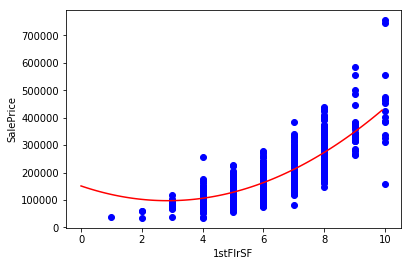

In [14]:
plt.scatter(X_train_poly, y_train,  color='blue')
XX = np.arange(0.0, 10, 0.1)
yy = poly_regr.intercept_+ poly_regr.coef_[1]*XX+ poly_regr.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
